# **Importing Necessary Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-drought-meteorological-data/soil_data.csv
/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv
/kaggle/input/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv
/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv


# Loading the Datasets

In [2]:
train_df = pd.read_csv('/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv')
test_df  = pd.read_csv('/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv')
val_df = pd.read_csv('/kaggle/input/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv')
soil_df = pd.read_csv('/kaggle/input/us-drought-meteorological-data/soil_data.csv')

# Merging Soil Data with Test, Validation, and Test Sets

In [3]:
train_data = train_df.merge(soil_df,on='fips', how='left')
validation_data = val_df.merge(soil_df, on = 'fips', how = 'left')
test_data = test_df.merge(soil_df, on = 'fips', how = 'left')

# Exploring The Data

In [4]:
print(train_data.head())
print(train_data.shape)
print(train_data.info())

   fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
0  1001  2000-01-01     0.22  100.51   9.65  14.74   13.51   13.51    20.96   
1  1001  2000-01-02     0.20  100.55  10.42  16.69   14.71   14.71    22.80   
2  1001  2000-01-03     3.65  100.15  11.76  18.49   16.52   16.52    22.73   
3  1001  2000-01-04    15.95  100.29   6.42  11.40    6.09    6.10    18.09   
4  1001  2000-01-05     0.00  101.15   2.95   3.86   -3.29   -3.20    10.82   

   T2M_MIN  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0    11.46  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
1    12.61  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
2    15.32  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
3     2.16  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
4    -2.66  ...    56.293411     1.014811  57.308224    1    1    1    1    1   

   SQ6  SQ7  
0    1    2  
1    1    

In [5]:
print(validation_data.head())
print(validation_data.shape)
print(validation_data.info())

   fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
0  1001  2017-01-01    32.50  100.02  10.47  14.69   14.47   14.47    17.68   
1  1001  2017-01-02    63.52  100.04  12.75  17.96   17.75   17.75    20.30   
2  1001  2017-01-03    18.82   99.69   9.74  14.24   13.44   13.44    18.48   
3  1001  2017-01-04     0.01  100.02   5.21   8.10    3.86    3.88    11.74   
4  1001  2017-01-05     0.01   99.89   4.54   5.91    2.20    2.22    13.07   

   T2M_MIN  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0    10.53  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
1    16.14  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
2     9.29  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
3     2.12  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
4    -0.18  ...    56.293411     1.014811  57.308224    1    1    1    1    1   

   SQ6  SQ7  
0    1    2  
1    1    

In [6]:
print(test_data.head())
print(test_data.shape)
print(test_data.info())

   fips        date  PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
0  1001  2019-01-01     2.25  100.51  9.69  14.71   13.55   13.52    17.38   
1  1001  2019-01-02     4.94  100.48  8.65  13.05   11.83   11.74    17.76   
2  1001  2019-01-03    20.74  100.03  8.59  12.12   11.67   11.67    13.74   
3  1001  2019-01-04    16.17   99.47  7.93  11.80   10.38    9.59    18.19   
4  1001  2019-01-05     0.01  100.39  5.32   7.91    4.73    4.71    14.37   

   T2M_MIN  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0    10.92  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
1     9.54  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
2    10.44  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
3     5.44  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
4     3.68  ...    56.293411     1.014811  57.308224    1    1    1    1    1   

   SQ6  SQ7  
0    1    2  
1    1    2  
2 

# Checking for Duplicates, Null Values & Dropping Them

In [7]:
train_data.duplicated().sum()

0

In [8]:
print(train_data.isnull().sum())

fips                    0
date                    0
PRECTOT                 0
PS                      0
QV2M                    0
T2M                     0
T2MDEW                  0
T2MWET                  0
T2M_MAX                 0
T2M_MIN                 0
T2M_RANGE               0
TS                      0
WS10M                   0
WS10M_MAX               0
WS10M_MIN               0
WS10M_RANGE             0
WS50M                   0
WS50M_MAX               0
WS50M_MIN               0
WS50M_RANGE             0
score            16543884
lat                     0
lon                     0
elevation               0
slope1                  0
slope2                  0
slope3                  0
slope4                  0
slope5                  0
slope6                  0
slope7                  0
slope8                  0
aspectN                 0
aspectE                 0
aspectS                 0
aspectW                 0
aspectUnknown           0
WAT_LAND                0
NVG_LAND    

In [9]:
print(validation_data.isnull().sum())

fips                   0
date                   0
PRECTOT                0
PS                     0
QV2M                   0
T2M                    0
T2MDEW                 0
T2MWET                 0
T2M_MAX                0
T2M_MIN                0
T2M_RANGE              0
TS                     0
WS10M                  0
WS10M_MAX              0
WS10M_MIN              0
WS10M_RANGE            0
WS50M                  0
WS50M_MAX              0
WS50M_MIN              0
WS50M_RANGE            0
score            1945608
lat                    0
lon                    0
elevation              0
slope1                 0
slope2                 0
slope3                 0
slope4                 0
slope5                 0
slope6                 0
slope7                 0
slope8                 0
aspectN                0
aspectE                0
aspectS                0
aspectW                0
aspectUnknown          0
WAT_LAND               0
NVG_LAND               0
URB_LAND               0


In [10]:
print(test_data.isnull().sum())

fips                   0
date                   0
PRECTOT                0
PS                     0
QV2M                   0
T2M                    0
T2MDEW                 0
T2MWET                 0
T2M_MAX                0
T2M_MIN                0
T2M_RANGE              0
TS                     0
WS10M                  0
WS10M_MAX              0
WS10M_MIN              0
WS10M_RANGE            0
WS50M                  0
WS50M_MAX              0
WS50M_MIN              0
WS50M_RANGE            0
score            1945608
lat                    0
lon                    0
elevation              0
slope1                 0
slope2                 0
slope3                 0
slope4                 0
slope5                 0
slope6                 0
slope7                 0
slope8                 0
aspectN                0
aspectE                0
aspectS                0
aspectW                0
aspectUnknown          0
WAT_LAND               0
NVG_LAND               0
URB_LAND               0


In [11]:
train_data = train_data.dropna()

In [12]:
validation_data = validation_data.dropna()

In [13]:
test_data = test_data.dropna()

# Date Column is in Datetime Format

In [14]:
# Function to process date column
def process_date_features(df):
    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Extract date components
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
    
    # Drop the original 'date' column if it's no longer needed
    df = df.drop(columns=['date'])
    return df

# Apply the function to train, validation, and test datasets
train_data = process_date_features(train_data)
validation_data = process_date_features(validation_data)
test_data = process_date_features(test_data)


# Rounding OFF the Target Variable "SCORE"

In [15]:
def round_score_to_integer(df):
    df['score'] = df['score'].round().astype(int)
    return df

train_data = round_score_to_integer(train_data)
validation_data = round_score_to_integer(validation_data)
test_data = round_score_to_integer(test_data)

print("Train Score Values:\n", train_data['score'].value_counts())
print("Validation Score Values:\n", validation_data['score'].value_counts())
print("Test Score Values:\n", test_data['score'].value_counts())

Train Score Values:
 score
0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: count, dtype: int64
Validation Score Values:
 score
0    220516
1     56389
2     28498
3     12334
4      4577
5       918
Name: count, dtype: int64
Test Score Values:
 score
0    247720
1     42486
2     22159
3      9590
4      3578
5       807
Name: count, dtype: int64


# Checking for Outliers

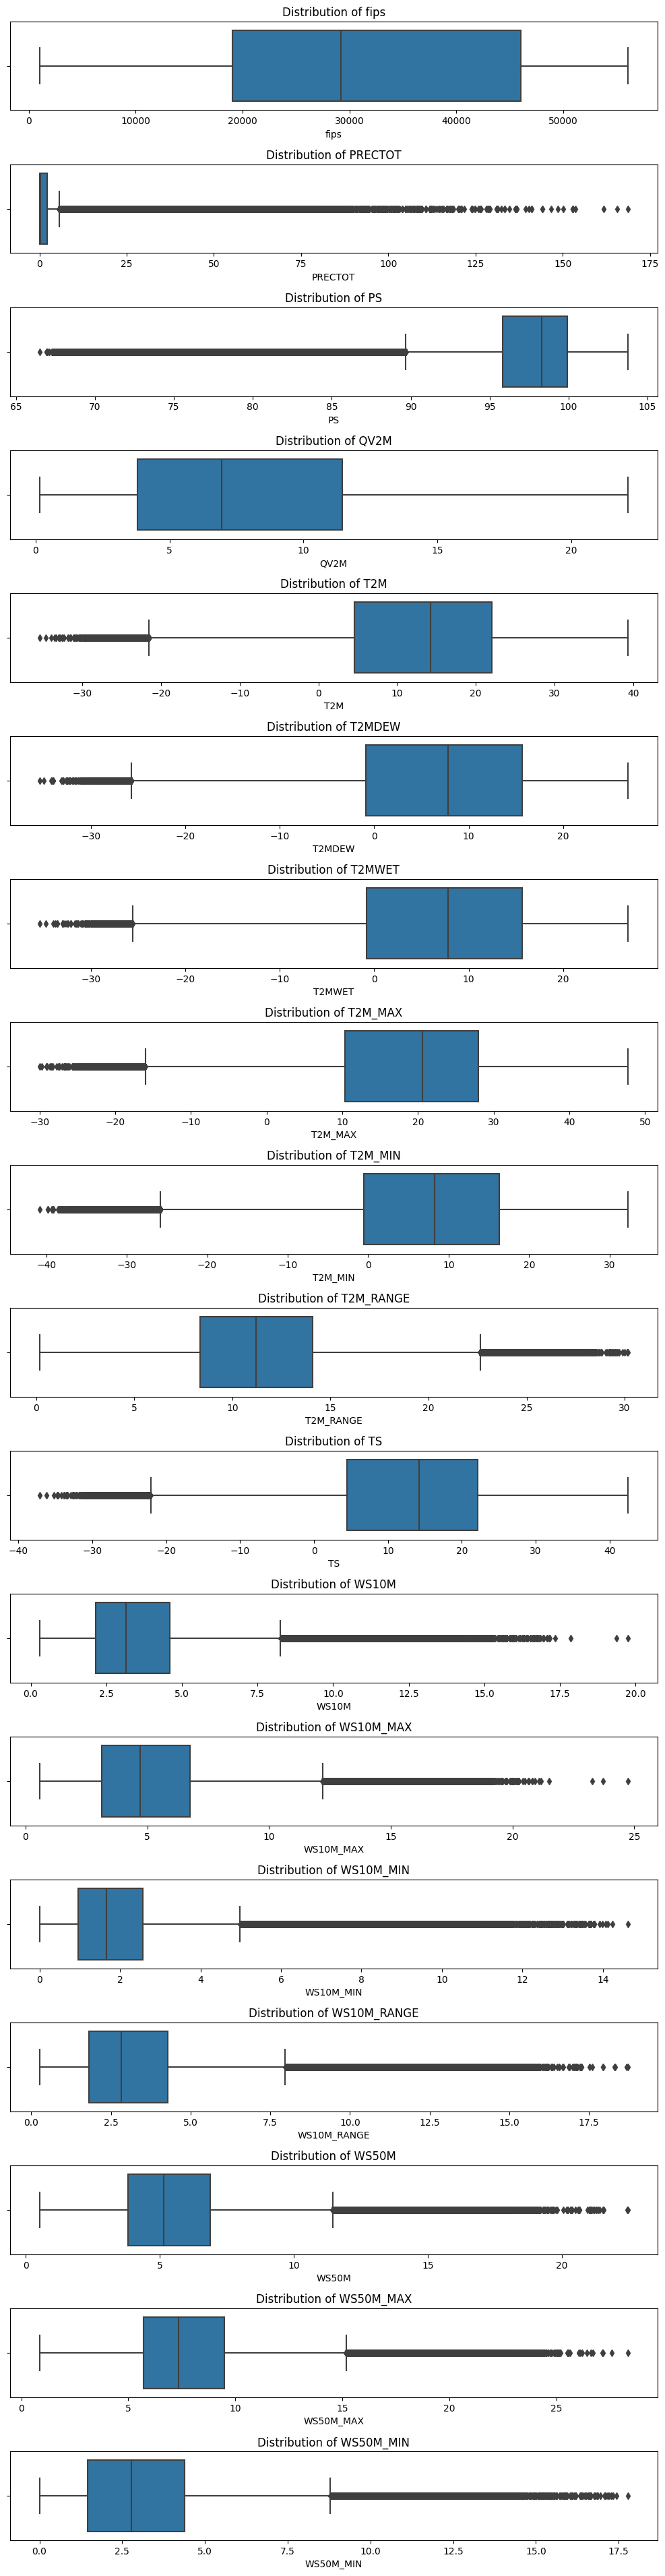

In [16]:
# Identify outliers:

plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  train_data.columns[x-1], data=train_data)
    x_name = train_data.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [16]:
# Select only continuous features (excluding the 'score' variable)
continuous_features = [col for col in train_data.columns if col not in ['score', 'date']]

# Apply outlier removal (e.g., using IQR) only on these features
Q1 = train_data[continuous_features].quantile(0.25)
Q3 = train_data[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where all continuous features are within bounds
train_data = train_data[~((train_data[continuous_features] < lower_bound) | 
                                  (train_data[continuous_features] > upper_bound)).any(axis=1)]


score
0    330792
1     87192
2     53164
3     32516
4     16930
5      5401
Name: count, dtype: int64


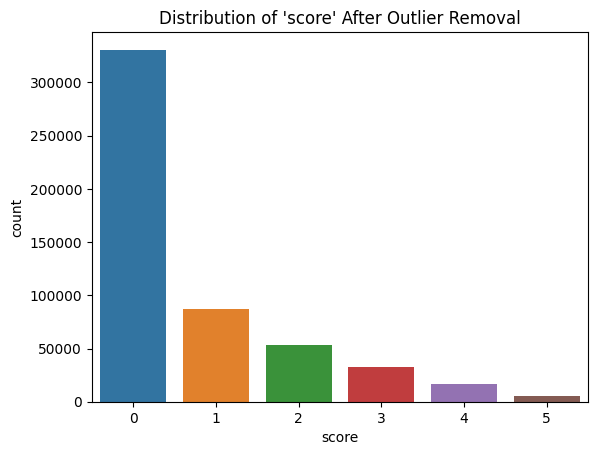

In [17]:
# Check the distribution of 'score'
print(train_data['score'].value_counts())

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='score', data=train_data)
plt.title("Distribution of 'score' After Outlier Removal")
plt.show()


In [18]:
# Select only continuous features (excluding the 'score' variable)
continuous_features = [col for col in validation_data.columns if col not in ['score', 'date']]

# Apply outlier removal (e.g., using IQR) only on these features
Q1 = validation_data[continuous_features].quantile(0.25)
Q3 = validation_data[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where all continuous features are within bounds
validation_data = validation_data[~((validation_data[continuous_features] < lower_bound) | 
                                  (validation_data[continuous_features] > upper_bound)).any(axis=1)]

score
0    43056
1    11300
2     5821
3     1693
4      322
5       11
Name: count, dtype: int64


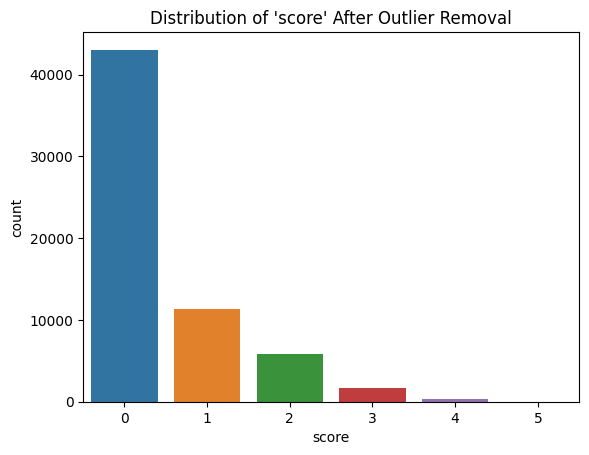

In [19]:
# Check the distribution of 'score'
print(validation_data['score'].value_counts())

sns.countplot(x='score', data=validation_data)
plt.title("Distribution of 'score' After Outlier Removal")
plt.show()

# Adjusting the Skewness

In [20]:
# Step 1: Calculate initial skewness, excluding 'score' from the analysis
initial_skewness = train_data.drop(columns=['score']).skew()

In [21]:
print(initial_skewness)

fips             0.023386
PRECTOT          2.094434
PS              -0.542277
QV2M             0.405882
T2M             -0.431084
T2MDEW          -0.421003
T2MWET          -0.409063
T2M_MAX         -0.498677
T2M_MIN         -0.372721
T2M_RANGE       -0.047358
TS              -0.407036
WS10M            0.758542
WS10M_MAX        0.688417
WS10M_MIN        0.652239
WS10M_RANGE      0.923324
WS50M            0.535397
WS50M_MAX        0.565647
WS50M_MIN        0.551371
WS50M_RANGE      0.692253
lat              0.189263
lon              0.308479
elevation        0.777957
slope1           1.510319
slope2           0.626715
slope3          -0.432095
slope4           0.324864
slope5           1.900291
slope6           3.225027
slope7           4.701339
slope8           0.000000
aspectN         -0.155167
aspectE         -0.163341
aspectS         -0.267425
aspectW         -0.349136
aspectUnknown    0.737784
WAT_LAND         0.000000
NVG_LAND         0.000000
URB_LAND         1.009070
GRS_LAND    

In [22]:
# Step 2: Define the skewness thresholds
high_skew_features = initial_skewness[initial_skewness > 2].index
mild_skew_features = initial_skewness[(initial_skewness > 1) & (initial_skewness <= 2)].index
negative_skew_features = initial_skewness[initial_skewness < -0.5].index

In [23]:
print(high_skew_features)
print(mild_skew_features)
print(negative_skew_features)

Index(['PRECTOT', 'slope6', 'slope7', 'GRS_LAND', 'CULTIR_LAND'], dtype='object')
Index(['slope1', 'slope5', 'URB_LAND'], dtype='object')
Index(['PS'], dtype='object')


In [24]:
# Step 3: Apply transformations to correct skewness for selected features in train data
# Log transformation for highly skewed features
for feature in high_skew_features:
    if feature != 'score':  # Exclude 'score' explicitly
        train_data[feature] = np.log1p(train_data[feature] + 1e-5)

# Square root transformation for mildly skewed features
for feature in mild_skew_features:
    if feature != 'score':  # Exclude 'score' explicitly
        train_data[feature] = np.sqrt(train_data[feature])

# Reflection and log transformation for negatively skewed features
for feature in negative_skew_features:
    if feature != 'score':  # Exclude 'score' explicitly
        train_data[feature] = np.log1p(train_data[feature].max() - train_data[feature] + 1e-5)

In [25]:
# Step 4: Recalculate skewness to verify the transformations' impact (excluding 'score')
skewness_after = train_data.drop(columns=['score']).skew().sort_values(ascending=False)
print("Skewness after transformations:\n", skewness_after)

Skewness after transformations:
 slope7           4.699410
slope6           3.153677
PRECTOT          1.409153
CULTIR_LAND      1.324532
WS10M_RANGE      0.923324
slope5           0.852969
slope1           0.808743
elevation        0.777957
WS10M            0.758542
aspectUnknown    0.737784
WS50M_RANGE      0.692253
WS10M_MAX        0.688417
WS10M_MIN        0.652239
slope2           0.626715
WS50M_MAX        0.565647
WS50M_MIN        0.551371
WS50M            0.535397
SQ2              0.500636
QV2M             0.405882
slope4           0.324864
lon              0.308479
SQ1              0.193260
lat              0.189263
CULTRF_LAND      0.140536
CULT_LAND        0.133490
URB_LAND         0.086756
FOR_LAND         0.044853
fips             0.023386
year             0.011773
day_of_week      0.000000
NVG_LAND         0.000000
SQ5              0.000000
SQ4              0.000000
SQ3              0.000000
slope8           0.000000
SQ7              0.000000
SQ6              0.000000
WAT_L

In [26]:
# Step 5: Further transformation for persistent high-skew features if needed
persistent_skew_features = skewness_after[skewness_after > 2].index
for feature in persistent_skew_features:
    if feature != 'score':  # Exclude 'score' explicitly in all transformations
        train_data[feature] = np.cbrt(train_data[feature])

In [27]:
# Step 6: Recheck skewness, excluding 'score'
final_skewness = train_data.drop(columns=['score']).skew().sort_values(ascending=False)
print("Final skewness after additional transformations:\n", final_skewness)

Final skewness after additional transformations:
 slope7           3.235993
PRECTOT          1.409153
CULTIR_LAND      1.324532
slope6           1.209922
WS10M_RANGE      0.923324
slope5           0.852969
slope1           0.808743
elevation        0.777957
WS10M            0.758542
aspectUnknown    0.737784
WS50M_RANGE      0.692253
WS10M_MAX        0.688417
WS10M_MIN        0.652239
slope2           0.626715
WS50M_MAX        0.565647
WS50M_MIN        0.551371
WS50M            0.535397
SQ2              0.500636
QV2M             0.405882
slope4           0.324864
lon              0.308479
SQ1              0.193260
lat              0.189263
CULTRF_LAND      0.140536
CULT_LAND        0.133490
URB_LAND         0.086756
FOR_LAND         0.044853
fips             0.023386
year             0.011773
day_of_week      0.000000
NVG_LAND         0.000000
SQ5              0.000000
SQ4              0.000000
SQ3              0.000000
slope8           0.000000
SQ7              0.000000
SQ6           

In [28]:
# Step 1: Calculate initial skewness, excluding 'score' from the analysis
initial_skewness_1 = validation_data.drop(columns=['score']).skew()

In [29]:
# Step 2: Define the skewness thresholds
high_skew_features_1 = initial_skewness_1[initial_skewness_1 > 2].index
mild_skew_features_1 = initial_skewness_1[(initial_skewness_1 > 1) & (initial_skewness_1 <= 2)].index
negative_skew_features_1 = initial_skewness_1[initial_skewness_1 < -0.5].index

In [30]:
# Step 3: Apply transformations to correct skewness for selected features in train data
# Log transformation for highly skewed features
for feature in high_skew_features_1:
    if feature != 'score':  # Exclude 'score' explicitly
        validation_data[feature] = np.log1p(validation_data[feature] + 1e-5)

# Square root transformation for mildly skewed features
for feature in mild_skew_features_1:
    if feature != 'score':  # Exclude 'score' explicitly
        validation_data[feature] = np.sqrt(validation_data[feature])

# Reflection and log transformation for negatively skewed features
for feature in negative_skew_features_1:
    if feature != 'score':  # Exclude 'score' explicitly
        validation_data[feature] = np.log1p(validation_data[feature].max() - validation_data[feature] + 1e-5)

In [31]:
# Step 4: Recalculate skewness to verify the transformations' impact (excluding 'score')
skewness_after_1 = validation_data.drop(columns=['score']).skew().sort_values(ascending=False)
print("Skewness after transformations:\n", skewness_after_1)

Skewness after transformations:
 slope7           4.721373
slope6           3.157676
CULTIR_LAND      1.325284
PRECTOT          1.325071
WS10M_RANGE      0.913671
slope5           0.855961
slope1           0.813597
elevation        0.802231
aspectUnknown    0.743666
WS10M            0.732766
WS10M_MAX        0.686385
WS50M_RANGE      0.677077
WS10M_MIN        0.645025
slope2           0.632224
WS50M_MAX        0.546683
WS50M_MIN        0.522795
WS50M            0.519213
SQ2              0.482086
slope4           0.323796
lon              0.305322
QV2M             0.237228
lat              0.204846
SQ1              0.190323
CULTRF_LAND      0.140276
CULT_LAND        0.133202
URB_LAND         0.091422
FOR_LAND         0.043611
fips             0.025691
T2M_RANGE        0.008353
day_of_week      0.000000
NVG_LAND         0.000000
SQ6              0.000000
SQ5              0.000000
SQ4              0.000000
SQ3              0.000000
slope8           0.000000
SQ7              0.000000
WAT_L

In [32]:
# Step 5: Further transformation for persistent high-skew features if needed
persistent_skew_features_1 = skewness_after_1[skewness_after_1 > 2].index
for feature in persistent_skew_features_1:
    if feature != 'score':  # Exclude 'score' explicitly in all transformations
        validation_data[feature] = np.cbrt(validation_data[feature])

In [33]:
# Step 6: Recheck skewness, excluding 'score'
final_skewness_1 = validation_data.drop(columns=['score']).skew().sort_values(ascending=False)
print("Final skewness after additional transformations:\n", final_skewness_1)

Final skewness after additional transformations:
 slope7           3.241298
CULTIR_LAND      1.325284
PRECTOT          1.325071
slope6           1.213834
WS10M_RANGE      0.913671
slope5           0.855961
slope1           0.813597
elevation        0.802231
aspectUnknown    0.743666
WS10M            0.732766
WS10M_MAX        0.686385
WS50M_RANGE      0.677077
WS10M_MIN        0.645025
slope2           0.632224
WS50M_MAX        0.546683
WS50M_MIN        0.522795
WS50M            0.519213
SQ2              0.482086
slope4           0.323796
lon              0.305322
QV2M             0.237228
lat              0.204846
SQ1              0.190323
CULTRF_LAND      0.140276
CULT_LAND        0.133202
URB_LAND         0.091422
FOR_LAND         0.043611
fips             0.025691
T2M_RANGE        0.008353
day_of_week      0.000000
NVG_LAND         0.000000
SQ6              0.000000
SQ5              0.000000
SQ4              0.000000
SQ3              0.000000
slope8           0.000000
SQ7           

# Correlation

In [34]:
import warnings
warnings.filterwarnings('ignore')
correlation_plot = train_data.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,year,month,day,day_of_week
fips,1.000000,-0.009186,0.146631,-0.055483,-0.039008,-0.057141,-0.057175,-0.040001,-0.039226,-0.015920,-0.035498,0.087571,0.091298,0.059210,0.085430,0.070743,0.086139,0.043767,0.064077,-0.033535,0.141601,-0.003826,0.134161,0.029370,0.027220,-0.021744,-0.028052,-0.018392,0.000043,0.044755,nan,-0.035718,0.042630,-0.073226,-0.036319,0.029458,nan,nan,0.086306,0.299939,-0.082406,-0.018957,0.061405,-0.018158,-0.085895,-0.097123,nan,nan,nan,nan,nan,0.001974,0.001521,-0.003194,nan
PRECTOT,-0.009186,1.000000,0.096525,0.302326,0.167611,0.266211,0.266253,0.104081,0.219720,-0.325883,0.169043,-0.002609,0.008379,-0.022258,0.026216,-0.018746,-0.039820,0.014374,-0.066503,-0.033165,0.007690,0.077137,-0.005387,-0.017435,-0.021917,-0.007736,0.026852,0.026184,0.023974,0.015393,nan,0.019032,0.017300,0.017456,0.017151,-0.020886,nan,nan,0.030919,-0.005614,0.040562,-0.032332,-0.003553,-0.032301,0.031007,0.036679,nan,nan,nan,nan,nan,-0.024963,0.007812,0.010032,nan
PS,0.146631,0.096525,1.000000,-0.085780,-0.084908,-0.104379,-0.104757,-0.094962,-0.086028,-0.059941,-0.080425,0.372356,0.393339,0.234152,0.381973,0.314620,0.362555,0.196042,0.257058,-0.040586,0.670751,-0.312804,0.854803,0.172715,0.160288,-0.278217,-0.071445,0.038033,0.087654,0.095776,nan,-0.133081,-0.089020,-0.190722,-0.175831,0.170928,nan,nan,-0.142403,-0.180576,-0.436460,0.414512,0.037766,0.413739,-0.387600,-0.363584,nan,nan,nan,nan,nan,0.025691,0.016468,0.023971,nan
QV2M,-0.055483,0.302326,-0.085780,1.000000,0.913047,0.960737,0.961660,0.871875,0.933292,0.102516,0.910148,-0.308616,-0.329134,-0.182693,-0.328403,-0.271889,-0.323901,-0.137903,-0.269341,0.009575,-0.327241,0.054903,-0.259427,-0.108137,-0.096334,0.104269,0.063551,0.023007,0.006873,0.004983,nan,0.082188,0.066154,0.110909,0.090881,-0.100892,nan,nan,0.045301,0.109042,0.162525,-0.169067,-0.023161,-0.168881,0.160164,0.138173,nan,nan,nan,nan,nan,0.058336,0.148973,-0.006535,nan
T2M,-0.039008,0.167611,-0.084908,0.913047,1.000000,0.960944,0.961248,0.988986,0.987231,0.339255,0.998797,-0.318674,-0.333579,-0.201946,-0.321703,-0.270562,-0.301712,-0.159862,-0.217412,0.111372,-0.341313,0.036745,-0.249949,-0.110472,-0.095050,0.110739,0.060666,0.014736,-0.000365,0.003608,nan,0.079116,0.069140,0.109451,0.089598,-0.100006,nan,nan,0.037098,0.138680,0.150313,-0.168339,-0.011152,-0.167957,0.162053,0.135090,nan,nan,nan,nan,nan,0.018118,0.201789,0.002720,nan
T2MDEW,-0.057141,0.266211,-0.104379,0.960737,0.960944,1.000000,0.999980,0.930755,0.969743,0.192407,0.956670,-0.326334,-0.346046,-0.192783,-0.344809,-0.268636,-0.317816,-0.139810,-0.259488,0.017990,-0.352756,0.086616,-0.286647,-0.126828,-0.114097,0.113913,0.079064,0.034557,0.016273,0.010403,nan,0.096648,0.080254,0.128788,0.106308,-0.118929,nan,nan,0.064942,0.120105,0.183834,-0.190016,-0.021504,-0.189742,0.185086,0.161258,nan,nan,nan,nan,nan,0.044199,0.172503,0.002189,nan
T2MWET,-0.057175,0.266253,-0.104757,0.961660,0.961248,0.999980,1.000000,0.930970,0.970113,0.191998,0.957028,-0.326388,-0.346077,-0.192941,-0.344747,-0.268945,-0.318124,-0.140020,-0.259660,0.018485,-0.353098,0.086233,-0.286780,-0.126814,-0.114048,0.114031,0.078983,0.034375,0.016081,0.010310,nan,0.096575,0.080235,0.128759,0.106290,-0.118886,nan,nan,0.064700,0.120251,0.183709,-0.189961,-0.021436,-0.189687,0.185056,0.161165,nan,nan,nan,nan,nan,0.044403,0.172512,0.002133,nan
T2M_MAX,-0.040001,0.104081,-0.094962,0.871875,0.988986,0.930755,0.930970,1.000000,0.958975,0.465565,0.986927,-0.332345,-0.345514,-0.212717,-0.330863,-0.275308,-0.295923,-0.177766,-0.190883,0.140317,-0.357115,0.024718,-0.250171,-0.120079,-0.102753,0.120079,0.066440,0.014

In [35]:
# Drop specific columns
columns_to_drop = ['day_of_week', 'SQ7', 'SQ6', 'SQ5', 'SQ4', 'SQ3', 'slope8', 'WAT_LAND', 'NVG_LAND']  # Replace with your column names
train_data = train_data.drop(columns=columns_to_drop)

print("Remaining columns:", train_data.columns)


Remaining columns: Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'aspectN', 'aspectE', 'aspectS',
       'aspectW', 'aspectUnknown', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'year',
       'month', 'day'],
      dtype='object')


In [36]:
correlation_plot_1 = train_data.corr()
correlation_plot_1.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,aspectN,aspectE,aspectS,aspectW,aspectUnknown,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,year,month,day
fips,1.000000,-0.009186,0.146631,-0.055483,-0.039008,-0.057141,-0.057175,-0.040001,-0.039226,-0.015920,-0.035498,0.087571,0.091298,0.059210,0.085430,0.070743,0.086139,0.043767,0.064077,-0.033535,0.141601,-0.003826,0.134161,0.029370,0.027220,-0.021744,-0.028052,-0.018392,0.000043,0.044755,-0.035718,0.042630,-0.073226,-0.036319,0.029458,0.086306,0.299939,-0.082406,-0.018957,0.061405,-0.018158,-0.085895,-0.097123,0.001974,0.001521,-0.003194
PRECTOT,-0.009186,1.000000,0.096525,0.302326,0.167611,0.266211,0.266253,0.104081,0.219720,-0.325883,0.169043,-0.002609,0.008379,-0.022258,0.026216,-0.018746,-0.039820,0.014374,-0.066503,-0.033165,0.007690,0.077137,-0.005387,-0.017435,-0.021917,-0.007736,0.026852,0.026184,0.023974,0.015393,0.019032,0.017300,0.017456,0.017151,-0.020886,0.030919,-0.005614,0.040562,-0.032332,-0.003553,-0.032301,0.031007,0.036679,-0.024963,0.007812,0.010032
PS,0.146631,0.096525,1.000000,-0.085780,-0.084908,-0.104379,-0.104757,-0.094962,-0.086028,-0.059941,-0.080425,0.372356,0.393339,0.234152,0.381973,0.314620,0.362555,0.196042,0.257058,-0.040586,0.670751,-0.312804,0.854803,0.172715,0.160288,-0.278217,-0.071445,0.038033,0.087654,0.095776,-0.133081,-0.089020,-0.190722,-0.175831,0.170928,-0.142403,-0.180576,-0.436460,0.414512,0.037766,0.413739,-0.387600,-0.363584,0.025691,0.016468,0.023971
QV2M,-0.055483,0.302326,-0.085780,1.000000,0.913047,0.960737,0.961660,0.871875,0.933292,0.102516,0.910148,-0.308616,-0.329134,-0.182693,-0.328403,-0.271889,-0.323901,-0.137903,-0.269341,0.009575,-0.327241,0.054903,-0.259427,-0.108137,-0.096334,0.104269,0.063551,0.023007,0.006873,0.004983,0.082188,0.066154,0.110909,0.090881,-0.100892,0.045301,0.109042,0.162525,-0.169067,-0.023161,-0.168881,0.160164,0.138173,0.058336,0.148973,-0.006535
T2M,-0.039008,0.167611,-0.084908,0.913047,1.000000,0.960944,0.961248,0.988986,0.987231,0.339255,0.998797,-0.318674,-0.333579,-0.201946,-0.321703,-0.270562,-0.301712,-0.159862,-0.217412,0.111372,-0.341313,0.036745,-0.249949,-0.110472,-0.095050,0.110739,0.060666,0.014736,-0.000365,0.003608,0.079116,0.069140,0.109451,0.089598,-0.100006,0.037098,0.138680,0.150313,-0.168339,-0.011152,-0.167957,0.162053,0.135090,0.018118,0.201789,0.002720
T2MDEW,-0.057141,0.266211,-0.104379,0.960737,0.960944,1.000000,0.999980,0.930755,0.969743,0.192407,0.956670,-0.326334,-0.346046,-0.192783,-0.344809,-0.268636,-0.317816,-0.139810,-0.259488,0.017990,-0.352756,0.086616,-0.286647,-0.126828,-0.114097,0.113913,0.079064,0.034557,0.016273,0.010403,0.096648,0.080254,0.128788,0.106308,-0.118929,0.064942,0.120105,0.183834,-0.190016,-0.021504,-0.189742,0.185086,0.161258,0.044199,0.172503,0.002189
T2MWET,-0.057175,0.266253,-0.104757,0.961660,0.961248,0.999980,1.000000,0.930970,0.970113,0.191998,0.957028,-0.326388,-0.346077,-0.192941,-0.344747,-0.268945,-0.318124,-0.140020,-0.259660,0.018485,-0.353098,0.086233,-0.286780,-0.126814,-0.114048,0.114031,0.078983,0.034375,0.016081,0.010310,0.096575,0.080235,0.128759,0.106290,-0.118886,0.064700,0.120251,0.183709,-0.189961,-0.021436,-0.189687,0.185056,0.161165,0.044403,0.172512,0.002133
T2M_MAX,-0.040001,0.104081,-0.094962,0.871875,0.988986,0.930755,0.930970,1.000000,0.958975,0.465565,0.986927,-0.332345,-0.345514,-0.212717,-0.330863,-0.275308,-0.295923,-0.177766,-0.190883,0.140317,-0.357115,0.024718,-0.250171,-0.120079,-0.102753,0.120079,0.066440,0.014056,-0.002737,0.004339,0.082588,0.077135,0.119631,0.096681,-0.107974,0.029169,0.149465,0.151432,-0.172798,-0.009469,-0.172370,0.169254,0.136528,0.006784,0.203306,-0.001150
T2M_MIN,-0.039226,0.219720,-0.086028,0.933292,0.987231,0.969743,0.970113,0.958975,1.000000,0.195573,0.986452,-0.312896,-0.329738,-0.19427

In [37]:
correlation_plot_2 = validation_data.corr()
correlation_plot_2.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,year,month,day,day_of_week
fips,1.000000,-0.006543,0.151544,-0.059328,0.026523,0.064766,0.064509,0.028051,-0.039287,-0.016571,-0.035738,0.094791,0.098237,0.058566,0.097649,0.074108,0.090931,0.035774,0.085374,0.006817,0.148651,-0.012716,0.146395,0.033310,0.031028,-0.025908,-0.030808,-0.020557,-0.001414,0.046680,nan,-0.038837,0.039468,-0.078163,-0.038787,0.033460,nan,nan,0.081612,0.298832,-0.088954,-0.012747,0.063852,-0.011925,-0.090767,-0.101058,nan,nan,nan,nan,nan,-0.001609,0.000825,-0.008764,nan
PRECTOT,-0.006543,1.000000,0.080906,0.376585,-0.245785,-0.380246,-0.381194,-0.177148,0.302702,-0.305516,0.254460,-0.043952,-0.027459,-0.071385,0.010088,-0.058967,-0.081089,-0.026564,-0.082007,-0.023994,-0.024930,0.093421,-0.028583,-0.033400,-0.036614,0.003870,0.038735,0.030401,0.025383,0.021498,nan,0.031061,0.027486,0.034749,0.029440,-0.036056,nan,nan,0.042026,0.009362,0.077411,-0.067422,-0.001824,-0.067247,0.070567,0.075344,nan,nan,nan,nan,nan,-0.020958,-0.051399,-0.035071,nan
PS,0.151544,0.080906,1.000000,-0.080006,0.072242,0.114958,0.115279,0.076718,-0.067835,-0.033422,-0.056955,0.351438,0.374279,0.220671,0.373638,0.294140,0.342962,0.186059,0.265491,-0.044569,0.661205,-0.323323,0.847264,0.173877,0.160854,-0.276391,-0.073090,0.036215,0.085642,0.096332,nan,-0.131074,-0.091187,-0.191409,-0.177106,0.171528,nan,nan,-0.149665,-0.169039,-0.426886,0.403988,0.034462,0.403196,-0.381083,-0.362075,nan,nan,nan,nan,nan,-0.080927,0.003729,0.036695,nan
QV2M,-0.059328,0.376585,-0.080006,1.000000,-0.943362,-0.993195,-0.993307,-0.901865,0.947020,0.096190,0.930683,-0.355204,-0.362800,-0.248835,-0.338429,-0.324697,-0.375060,-0.192818,-0.302087,-0.092047,-0.342885,0.084553,-0.272235,-0.119210,-0.105966,0.105841,0.073520,0.031337,0.014209,0.011167,nan,0.089717,0.071849,0.123774,0.098899,-0.110876,nan,nan,0.066726,0.108221,0.183518,-0.186999,-0.023804,-0.186779,0.182548,0.161486,nan,nan,nan,nan,nan,-0.035003,0.096863,-0.067605,nan
T2M,0.026523,-0.245785,0.072242,-0.943362,1.000000,0.932866,0.931858,0.985561,-0.956403,-0.236050,-0.963959,0.348180,0.352672,0.256660,0.318948,0.332527,0.365365,0.215813,0.263402,0.017256,0.341093,-0.016441,0.249750,0.099827,0.084747,-0.111573,-0.048252,-0.004683,0.009462,0.003375,nan,-0.070946,-0.061373,-0.099550,-0.080527,0.089911,nan,nan,-0.026969,-0.145731,-0.147728,0.168925,0.018744,0.168652,-0.154570,-0.130783,nan,nan,nan,nan,nan,0.058212,-0.119829,0.067060,nan
T2MDEW,0.064766,-0.380246,0.114958,-0.993195,0.932866,1.000000,0.999845,0.886032,-0.933324,-0.071807,-0.912083,0.362020,0.371021,0.251344,0.348225,0.330128,0.383901,0.194024,0.312893,0.099306,0.364148,-0.091538,0.300431,0.120246,0.107291,-0.113691,-0.072045,-0.026768,-0.008009,-0.005569,nan,-0.090788,-0.071496,-0.125926,-0.101457,0.112446,nan,nan,-0.067230,-0.115031,-0.197384,0.200254,0.025060,0.200008,-0.192286,-0.171420,nan,nan,nan,nan,nan,0.016479,-0.105737,0.065837,nan
T2MWET,0.064509,-0.381194,0.115279,-0.993307,0.931858,0.999845,1.000000,0.884420,-0.932539,-0.067096,-0.910618,0.361930,0.370885,0.251537,0.347904,0.330719,0.384625,0.194224,0.313667,0.099819,0.363429,-0.091430,0.300078,0.119859,0.106929,-0.113383,-0.071744,-0.026668,-0.008001,-0.005548,nan,-0.090527,-0.071162,-0.125598,-0.101103,0.112077,nan,nan,-0.067341,-0.114464,-0.196648,0.199456,0.024922,0.199210,-0.191604,-0.170801,nan,nan,nan,nan,nan,0.023676,-0.104840,0.066259,nan
T2M_MAX,0.028051,-0.177148,0.076718,-0.901865,0.985561,0.886032,0.884420,1.000000,-0.932307,-0.373612,-0.958642,0.356846,0.359636,0.262732,0.324564,0.330056,0.352653,0.228061,0.232432,-0.011855,0.356706,-0.005993,0.248283,0.109986,0.093705,-0.123325,-0.0546

In [38]:
# Drop specific columns
columns_to_drop = ['day_of_week', 'SQ7', 'SQ6', 'SQ5', 'SQ4', 'SQ3', 'slope8', 'WAT_LAND', 'NVG_LAND']  # Replace with your column names
validation_data = validation_data.drop(columns=columns_to_drop)

print("Remaining columns:", validation_data.columns)

Remaining columns: Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'aspectN', 'aspectE', 'aspectS',
       'aspectW', 'aspectUnknown', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'year',
       'month', 'day'],
      dtype='object')


In [39]:
correlation_plot_3 = validation_data.corr()
correlation_plot_3.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,aspectN,aspectE,aspectS,aspectW,aspectUnknown,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,year,month,day
fips,1.000000,-0.006543,0.151544,-0.059328,0.026523,0.064766,0.064509,0.028051,-0.039287,-0.016571,-0.035738,0.094791,0.098237,0.058566,0.097649,0.074108,0.090931,0.035774,0.085374,0.006817,0.148651,-0.012716,0.146395,0.033310,0.031028,-0.025908,-0.030808,-0.020557,-0.001414,0.046680,-0.038837,0.039468,-0.078163,-0.038787,0.033460,0.081612,0.298832,-0.088954,-0.012747,0.063852,-0.011925,-0.090767,-0.101058,-0.001609,0.000825,-0.008764
PRECTOT,-0.006543,1.000000,0.080906,0.376585,-0.245785,-0.380246,-0.381194,-0.177148,0.302702,-0.305516,0.254460,-0.043952,-0.027459,-0.071385,0.010088,-0.058967,-0.081089,-0.026564,-0.082007,-0.023994,-0.024930,0.093421,-0.028583,-0.033400,-0.036614,0.003870,0.038735,0.030401,0.025383,0.021498,0.031061,0.027486,0.034749,0.029440,-0.036056,0.042026,0.009362,0.077411,-0.067422,-0.001824,-0.067247,0.070567,0.075344,-0.020958,-0.051399,-0.035071
PS,0.151544,0.080906,1.000000,-0.080006,0.072242,0.114958,0.115279,0.076718,-0.067835,-0.033422,-0.056955,0.351438,0.374279,0.220671,0.373638,0.294140,0.342962,0.186059,0.265491,-0.044569,0.661205,-0.323323,0.847264,0.173877,0.160854,-0.276391,-0.073090,0.036215,0.085642,0.096332,-0.131074,-0.091187,-0.191409,-0.177106,0.171528,-0.149665,-0.169039,-0.426886,0.403988,0.034462,0.403196,-0.381083,-0.362075,-0.080927,0.003729,0.036695
QV2M,-0.059328,0.376585,-0.080006,1.000000,-0.943362,-0.993195,-0.993307,-0.901865,0.947020,0.096190,0.930683,-0.355204,-0.362800,-0.248835,-0.338429,-0.324697,-0.375060,-0.192818,-0.302087,-0.092047,-0.342885,0.084553,-0.272235,-0.119210,-0.105966,0.105841,0.073520,0.031337,0.014209,0.011167,0.089717,0.071849,0.123774,0.098899,-0.110876,0.066726,0.108221,0.183518,-0.186999,-0.023804,-0.186779,0.182548,0.161486,-0.035003,0.096863,-0.067605
T2M,0.026523,-0.245785,0.072242,-0.943362,1.000000,0.932866,0.931858,0.985561,-0.956403,-0.236050,-0.963959,0.348180,0.352672,0.256660,0.318948,0.332527,0.365365,0.215813,0.263402,0.017256,0.341093,-0.016441,0.249750,0.099827,0.084747,-0.111573,-0.048252,-0.004683,0.009462,0.003375,-0.070946,-0.061373,-0.099550,-0.080527,0.089911,-0.026969,-0.145731,-0.147728,0.168925,0.018744,0.168652,-0.154570,-0.130783,0.058212,-0.119829,0.067060
T2MDEW,0.064766,-0.380246,0.114958,-0.993195,0.932866,1.000000,0.999845,0.886032,-0.933324,-0.071807,-0.912083,0.362020,0.371021,0.251344,0.348225,0.330128,0.383901,0.194024,0.312893,0.099306,0.364148,-0.091538,0.300431,0.120246,0.107291,-0.113691,-0.072045,-0.026768,-0.008009,-0.005569,-0.090788,-0.071496,-0.125926,-0.101457,0.112446,-0.067230,-0.115031,-0.197384,0.200254,0.025060,0.200008,-0.192286,-0.171420,0.016479,-0.105737,0.065837
T2MWET,0.064509,-0.381194,0.115279,-0.993307,0.931858,0.999845,1.000000,0.884420,-0.932539,-0.067096,-0.910618,0.361930,0.370885,0.251537,0.347904,0.330719,0.384625,0.194224,0.313667,0.099819,0.363429,-0.091430,0.300078,0.119859,0.106929,-0.113383,-0.071744,-0.026668,-0.008001,-0.005548,-0.090527,-0.071162,-0.125598,-0.101103,0.112077,-0.067341,-0.114464,-0.196648,0.199456,0.024922,0.199210,-0.191604,-0.170801,0.023676,-0.104840,0.066259
T2M_MAX,0.028051,-0.177148,0.076718,-0.901865,0.985561,0.886032,0.884420,1.000000,-0.932307,-0.373612,-0.958642,0.356846,0.359636,0.262732,0.324564,0.330056,0.352653,0.228061,0.232432,-0.011855,0.356706,-0.005993,0.248283,0.109986,0.093705,-0.123325,-0.054624,-0.002440,0.014161,0.004375,-0.075318,-0.071152,-0.109804,-0.088171,0.098942,-0.013869,-0.163007,-0.154447,0.180063,0.017531,0.179723,-0.166562,-0.137408,0.074427,-0.115679,0.062351
T2M_MIN,-0.039287,0.302702,-0.067835,0.947020,-0.956403,-0.933324,-0.932539,-0.932307,1.000000,0.142336,0.986470,-0.355954,-

In [44]:
correlation_plot_3 = test_data.corr()
correlation_plot_3.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,year,month,day,day_of_week
fips,1.000000,-0.019922,-0.036158,-0.057450,-0.049051,-0.050460,-0.051761,-0.049211,-0.050102,-0.008032,-0.044724,0.050722,0.045396,0.034399,0.036998,0.055844,0.062847,0.035763,0.046349,-0.003298,0.141188,0.046335,0.021808,-0.087860,-0.087551,-0.058185,0.040731,0.123977,0.108115,0.042048,0.005915,0.081457,0.088149,0.039555,0.045971,-0.098475,0.044623,0.044605,-0.001753,0.193198,-0.016351,-0.121080,-0.132481,-0.157667,-0.016870,0.005978,0.065891,-0.016595,0.035304,0.041017,0.089703,0.000000,0.000000,0.000000,nan
PRECTOT,-0.019922,1.000000,0.073904,0.225188,0.096873,0.216142,0.214408,0.038072,0.140574,-0.279291,0.095679,0.060851,0.071811,0.032583,0.072911,0.068972,0.073980,0.061379,0.036513,-0.045539,-0.051907,0.077024,-0.093849,-0.012726,-0.025538,0.030369,0.027572,0.002230,-0.007572,-0.009847,-0.011679,0.015188,0.016237,0.028715,0.020222,-0.024464,0.001133,-0.058899,0.006632,-0.079822,0.058412,0.014695,-0.019722,0.008003,0.051200,0.033427,-0.015704,0.007271,-0.011122,-0.007568,-0.013605,0.016549,-0.034790,0.043622,nan
PS,-0.036158,0.073904,1.000000,0.291043,0.176514,0.358778,0.359810,0.119935,0.223182,-0.263869,0.176525,-0.085867,-0.136817,0.024800,-0.196161,-0.044718,-0.090659,0.038125,-0.150822,-0.318172,-0.284424,0.614069,-0.969794,0.145040,0.176365,0.220584,-0.036665,-0.234783,-0.334823,-0.358637,-0.338668,-0.237375,-0.226981,-0.145522,-0.176762,0.187821,0.106941,-0.336581,0.102047,-0.481020,0.104255,0.264487,-0.082131,0.228885,0.246487,0.189181,-0.078595,0.164393,-0.009298,0.021911,-0.045423,0.001644,-0.008139,-0.000015,nan
QV2M,-0.057450,0.225188,0.291043,1.000000,0.883240,0.955312,0.959481,0.823517,0.911682,-0.071054,0.876741,-0.233731,-0.260642,-0.105144,-0.273266,-0.211670,-0.251765,-0.080321,-0.244589,-0.081821,-0.389226,0.217819,-0.310478,0.069218,0.064592,0.108283,-0.026886,-0.105613,-0.120032,-0.112659,-0.102692,-0.068177,-0.072267,-0.034603,-0.064579,0.074104,-0.000753,-0.111439,0.020046,-0.120006,0.089541,0.008564,-0.022808,0.001147,0.119945,0.071662,-0.050598,0.050337,-0.039735,-0.030255,-0.030981,-0.000244,0.105651,-0.017037,nan
T2M,-0.049051,0.096873,0.176514,0.883240,1.000000,0.922757,0.922069,0.984454,0.983452,0.213421,0.997619,-0.245111,-0.252613,-0.146473,-0.235478,-0.226880,-0.235551,-0.135565,-0.172296,0.048337,-0.421176,0.090547,-0.200031,0.054409,0.067700,0.092422,-0.031970,-0.093449,-0.097598,-0.088678,-0.084705,-0.057268,-0.058563,-0.035228,-0.055645,0.071680,-0.020766,0.013904,0.008674,0.017782,0.035570,-0.073574,0.026996,-0.062381,0.081515,0.039102,-0.033118,0.021362,-0.032608,-0.028180,-0.019710,0.038131,0.168537,-0.028198,nan
T2MDEW,-0.050460,0.216142,0.358778,0.955312,0.922757,1.000000,0.998329,0.870069,0.941936,-0.015390,0.915961,-0.254511,-0.280128,-0.118626,-0.289993,-0.215461,-0.251430,-0.088088,-0.236895,-0.093327,-0.403643,0.259736,-0.378258,0.057103,0.047304,0.111966,-0.010804,-0.094512,-0.115912,-0.116534,-0.115806,-0.061878,-0.066476,-0.020394,-0.052892,0.056386,0.008534,-0.132099,0.031576,-0.151438,0.112763,0.004430,-0.026413,-0.003952,0.151271,0.096539,-0.049085,0.056774,-0.035230,-0.023345,-0.028884,0.021223,0.114319,-0.011605,nan
T2MWET,-0.051761,0.214408,0.359810,0.959481,0.922069,0.998329,1.000000,0.868723,0.943168,-0.022908,0.914939,-0.255874,-0.281876,-0.118760,-0.292202,-0.217338,-0.253734,-0.088828,-0.239129,-0.083672,-0.408783,0.259095,-0.378884,0.059409,0.050552,0.113976,-0.012917,-0.098088,-0.119468,-0.119330,-0.117711,-0.064467,-0.069055,-0.023273,-0.055750,0.059725,0.008425,-0.129839,0.030861,-0.149426,0.110512,0.004364,-0.025421,-0.003707,0.150847,0.095987,-0.049573,0.0572

In [45]:
# Drop specific columns
columns_to_drop = ['day_of_week', 'SQ7', 'SQ6', 'SQ5', 'SQ4', 'SQ3', 'slope8', 'WAT_LAND', 'NVG_LAND']  # Replace with your column names
test_data = test_data.drop(columns=columns_to_drop)

print("Remaining columns:", test_data.columns)

Remaining columns: Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'aspectN', 'aspectE', 'aspectS',
       'aspectW', 'aspectUnknown', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'year',
       'month', 'day'],
      dtype='object')


# Preparing the Feature & Target Variable

In [46]:
X_train = train_data.drop(['score'],axis=1)
y_train = train_data['score']

In [47]:
X_val = validation_data.drop(['score'],axis=1)
y_val = validation_data['score']

In [48]:
X_test = test_data.drop(['score'],axis=1)
y_test = test_data['score']

# Data Scaling for Logistic Regression

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Training & Evaluating Models

## Decision Tree

In [50]:
tree = DecisionTreeClassifier(max_depth=7,criterion='gini',random_state=42)
tree.fit(X_train, y_train)
#,min_samples_split=10,min_samples_leaf=5,max_features='sqrt')
#max_depth=7,criterion='gini',random_state=42,min_samples_split=5,min_samples_leaf=5

DecisionTreeClassifier(max_depth=7, random_state=42)

In [51]:
y_val_pred_tree = tree.predict(X_val)
y_test_pred_tree = tree.predict(X_test)

In [52]:
print(y_val_pred_tree)
print(y_test_pred_tree)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [53]:
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred_tree))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_tree))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, y_val_pred_tree))
print("Classification Report (Val):\n", classification_report(y_val, y_val_pred_tree,zero_division=0))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_tree))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_tree,zero_division=0))

Decision Tree Validation Accuracy: 0.6921852643763162
Decision Tree Test Accuracy: 0.7504473861616718
Confusion Matrix (Val):
 [[43056     0     0     0     0     0]
 [11300     0     0     0     0     0]
 [ 5821     0     0     0     0     0]
 [ 1693     0     0     0     0     0]
 [  322     0     0     0     0     0]
 [   11     0     0     0     0     0]]
Classification Report (Val):
               precision    recall  f1-score   support

           0       0.69      1.00      0.82     43056
           1       0.00      0.00      0.00     11300
           2       0.00      0.00      0.00      5821
           3       0.00      0.00      0.00      1693
           4       0.00      0.00      0.00       322
           5       0.00      0.00      0.00        11

    accuracy                           0.69     62203
   macro avg       0.12      0.17      0.14     62203
weighted avg       0.48      0.69      0.57     62203

Confusion Matrix (Test):
 [[242339   2963   1950    468      0   

## Logistic Regression (Softmax)

In [54]:
lr_softmax = LogisticRegression(multi_class='multinomial',max_iter=2000)
lr_softmax.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [55]:
y_val_pred_softmax = lr_softmax.predict(X_val)
y_test_pred_softmax = lr_softmax.predict(X_test)
print(y_val_pred_softmax)
print(y_test_pred_softmax)

[0 3 4 ... 0 0 0]
[5 5 5 ... 5 5 5]


In [56]:
print("Logistic Regression (Softmax) Validation Accuracy:", accuracy_score(y_val, y_val_pred_softmax))
print("Logistic Regression (Softmax) Test Accuracy:", accuracy_score(y_test, y_test_pred_softmax))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, y_val_pred_softmax))
print("Classification Report (Val):\n", classification_report(y_val, y_val_pred_softmax))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_softmax))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_softmax))

Logistic Regression (Softmax) Validation Accuracy: 0.28717264440621837
Logistic Regression (Softmax) Test Accuracy: 0.002604645461788319
Confusion Matrix (Val):
 [[16760    98  3027 14168   212  8791]
 [ 4689    27   894  3905    88  1697]
 [ 2593    11   452  2027    43   695]
 [  760     3    81   621    17   211]
 [   87     0     8   208     3    16]
 [    0     0     1    10     0     0]]
Classification Report (Val):
               precision    recall  f1-score   support

           0       0.67      0.39      0.49     43056
           1       0.19      0.00      0.00     11300
           2       0.10      0.08      0.09      5821
           3       0.03      0.37      0.05      1693
           4       0.01      0.01      0.01       322
           5       0.00      0.00      0.00        11

    accuracy                           0.29     62203
   macro avg       0.17      0.14      0.11     62203
weighted avg       0.51      0.29      0.35     62203

Confusion Matrix (Test):
 [[  

## ANN

In [61]:
y_train_encoded = to_categorical(y_train,num_classes=6)
y_val_encoded = to_categorical(y_val,num_classes=6)
y_test_encoded = to_categorical(y_test,num_classes=6)

In [62]:
ann_model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(50, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(150, activation = 'relu'),
    Dense(200, activation = 'relu'),
    Dense(250, activation = 'relu'),
    Dense(6, activation = 'softmax')
])

In [63]:
ann_model.compile(optimizer = Adam(learning_rate = 0.001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [66]:
ann_model.fit(X_train, y_train_encoded, epochs = 10, batch_size=32, validation_data = (X_val, y_val_encoded), verbose = 1)

Epoch 1/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8272 - loss: 0.4125 - val_accuracy: 0.5759 - val_loss: 19.8094
Epoch 2/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.8277 - loss: 0.4102 - val_accuracy: 0.6022 - val_loss: 33.9349
Epoch 3/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8270 - loss: 0.4111 - val_accuracy: 0.5733 - val_loss: 31.3924
Epoch 4/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8270 - loss: 0.4115 - val_accuracy: 0.5994 - val_loss: 33.4464
Epoch 5/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8276 - loss: 0.4125 - val_accuracy: 0.5245 - val_loss: 18.2982
Epoch 6/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8282 - loss: 0.4093 - val_accuracy: 0.5270 - val_loss: 38.0510
Epoch 7/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8269 - loss: 0.4122 - val_accuracy: 0.5543 - val_loss: 37.9021
Epoch 8/10
16438/16438 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - acc

In [67]:
y_pred_ann = ann_model.predict(X_test)
y_predict_ann_labels = y_pred_ann.argmax(axis = 1)
accuracy_ann = accuracy_score(y_test, y_predict_ann_labels)

10199/10199 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


In [68]:
print("ANN Accuracy", accuracy_ann)

ANN Accuracy 0.7590856162284734


In [70]:
y_pred_ann_1 = ann_model.predict(X_val)
y_predict_ann_labels_1 = y_pred_ann_1.argmax(axis = 1)
accuracy_ann_1 = accuracy_score(y_val, y_predict_ann_labels_1)

1944/1944 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [71]:
print("ANN Accuracy", accuracy_ann_1)

ANN Accuracy 0.5609858045431892
